**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [4]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

from keras.utils import np_utils


# Data Preprocessing

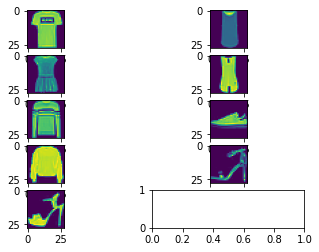

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train= x_train.reshape(60000,28,28,1)
# x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28,1)
# x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.np_utils.to_categorical(y_train,10)

y_test=keras.utils.np_utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

# Build CNN Model

In [8]:
x_train /= 255
x_test /=255
batch_size=64 

num_classes=10
epochs=2

def build_model(optimizer): 

  model=Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape)) 

  model.add(MaxPooling2D(pool_size=(2,2))) 

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu')) 

  model.add(MaxPooling2D(pool_size=(2,2))) 

  model.add(Dropout(0.25)) 

  model.add(Flatten()) 

  model.add(Dense(256, activation='relu')) 

  model.add(Dropout(0.5)) 

  model.add(Dense(num_classes, activation='softmax')) 

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy']) 
  model.summary()

  return model 

# optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'] 

# #for i in optimizers: 

model = build_model('RMSprop') 


plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test)) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

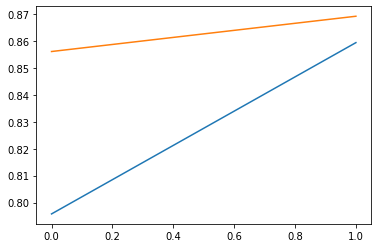

In [9]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

# Predict Image

[[1.79071748e-03 1.67716935e-04 9.10828728e-03 9.66540712e-04
  2.50917435e-01 1.15697265e-04 7.32813597e-01 6.79846562e-06
  4.07859730e-03 3.45722765e-05]]
Shirt


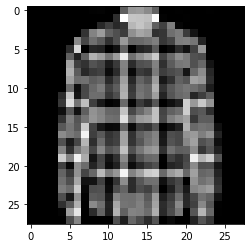

In [12]:
keras.models.save_model(model, "mnist.h5", save_format="h5")
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def predict_image(model, img):
  # img = cv2.resize(img, (28,28,1))
  img = np.reshape(img,(1, 28, 28,1))
  pred = model.predict(img)
  img = img.astype('float32')
  img /=255
  print(pred)
  answer = np.argmax(pred)
  print(labels[answer])
  #label = '' if np.array(pred).size >= 0.5 else 'NORMAL'
  #print("prediction: ", label, "P(Pneumonia): ", pred[0][0])


m = load_model('./mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')
